# 2.4.0 Let's Predict the Sentiment

In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk import word_tokenize

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [18]:
import sys
sys.path.append("../") 

from utils.info4 import positive_reviews
from utils.paths import make_dir_line

modality = 'c'
project = 'Sentiment Analysis in Python'
data = make_dir_line(modality, project)

raw = data('raw')

## 2.4.2 Logistic regression of movie reviews

** sample of 50 **

In [4]:
movies = pd.read_csv(raw / "movies2.csv", sep=',')
movies.head()

,label,about,acting,action,actors,actually,after,again,all,also,an,and,another,any,are,around,as,at,back,bad,be,because,been,before,being,best,better,big,both,br,but,by,can,cast,character,characters,comedy,could,did,didn,director,do,does,doesn,don,down,end,enough,even,ever,every,fact,few,film,films,find,first,for,from,funny,get,give,go,going,good,got,great,had,has,have,he,her,here,him,his,horror,how,however,if,in,into,is,it,its,just,know,life,like,little,long,look,lot,love,made,make,makes,man,many,may,me,more,most,movie,movies,much,must,my,never,new,no,not,nothing,now,of,off,old,on,one,only,or,original,other,out,over,part,people,plot,point,pretty,quite,re,real,really,same,say,scene,scenes,see,seems,seen,series,she,should,show,so,some,something,still,story,such,take,than,that,the,their,them,then,there,these,they,thing,things,think,this,those,though,thought,through,time,to,too,two,up,us,ve,very,want,was,watch,watching,way,we,well,were,what,when,where,which,while,who,why,will,with,without,work,world,would,years,you,young,your
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,0,0,1,0,0,12,0,0,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,3,1,1,11,0,0,3,0,3,4,1,0,1,0,0,0,1,0,1,1,0,12,2,0,3,0,0,0,2,0,0,0,0,0,0,2,0,1,0,0,1,0,0,2,0,2,1,0,0,3,2,2,0,1,0,0,2,1,0,0,1,0,1,2,1,2,1,0,1,0,0,8,0,8,9,3,0,0,0,4,2,0,0,0,2,1,1,0,0,3,0,0,3,3,2,0,0,0,0,0,0,0,1,0,1,16,0,1,5,0,3,0,0,1,1,1,1,0,0,0,0,2,0,0,2,0,0,0,0,2,0,0,0,0,1,0,5,3,1,2,0,0,0,1,8,33,3,0,1,0,0,1,0,1,0,3,0,2,0,0,2,6,0,0,2,1,0,0,0,2,0,0,0,0,0,0,1,1,0,2,0,0,0,2,7,1,0,0,2,0,3,0,2
2,1,0,0,0,0,0,1,0,0,0,1,7,0,0,1,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,2,0,1,0,0,0,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,5,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,9,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,3,0,0,8,1,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,10,1,1,0,0,0,0,0,2,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,7,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,2,0,1,0,1,0,1,0,0,1,2,0,0,7,0,0,0,2,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,2,0,0,0,1,2,0,0,0,2,1,0,0,0,1,4,1,0,0,0,0,3,0,1,0,0,0,0,2,1,0,1,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0


In [5]:
# Define the vector of targets and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  1.0


## 2.4.3 Logistic regression using Twitter data

In [6]:
tweets = pd.read_csv(raw / "tweets2.csv", sep=',')
tweets.head()

,airline_sentiment,airline_sentiment_confidence,retweet_count,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,attendant complaints,bad flight,booking problems,cancelled flight,customer service,damaged luggage,flight attendant,flight booking,late flight,lost luggage,service issue,aa,agent,airline,airport,americanair,amp,bag,baggage,bags,cancelled,cancelled flighted,cancelled flightled,care,change,check,customer,customer service.1,day,delay,delayed,did,didn,dm,don,email,flight,flight cancelled,flighted,flightled,flights,fly,flying,gate,getting,going,good,got,great,guys,help,hold,home,hope,hour,hours,hrs,http,jetblue,just,know,late,late flight.1,let,like,ll,love,luggage,make,min,minutes,need,new,number,online,people,phone,plane,problems,really,response,seat,seats,sent,service,southwestair,staff,stuck,thank,thanks,ticket,time,times,today,told,tomorrow,travel,trying,united,usairways,ve,virginamerica,wait,waiting,want,way,weather,won,work,worst,yes
0,0,1.000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.707,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.000,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Define the vector of targets and matrix of features
y = tweets.airline_sentiment
X = tweets.drop('airline_sentiment', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

# Create an array of prediction
y_predict = log_reg.predict(X)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))

Accuracy of logistic regression:  0.9
Accuracy of logistic regression:  0.9


## 2.4.5 Build and assess a model: movies reviews

In [8]:
# Define the vector of labels and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  1.0
Accuracy on test set:  0.5


## 2.4.6 Performance metrics of Twitter data

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)
 
# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.4
Confusion matrix test set: 
 [[0.2        0.33333333]
 [0.26666667 0.2       ]]


## 2.4.7 Build and assess a model: product reviews data

In [10]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the labels 
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))

Accuracy score of test data:  0.5333333333333333
Confusion matrix of test data: 
 [[0.13333333 0.2       ]
 [0.26666667 0.4       ]]


## 2.4.9 Predict probabilities of movie reviews

In [11]:
# Define the vector of labels and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

In [12]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [9.91990216e-01 7.48911127e-01 3.31859278e-01 9.20161920e-01
 1.04248485e-02 9.74322174e-01 3.47745215e-01 5.51982217e-01
 1.16053270e-02 1.97129886e-04]
First 10 predicted probabilities of class 1:  [0.00800978 0.25108887 0.66814072 0.07983808 0.98957515 0.02567783
 0.65225478 0.44801778 0.98839467 0.99980287]


## 2.4.10 Product reviews with regularization

In [13]:
reviews = pd.read_csv(raw / "reviews2.csv", sep=',')
reviews.head()

,score,able,acting,action,actually,ago,album,amazing,amazon,author,away,bad,beautiful,believe,best,better,big,bit,book,books,boring,bought,buy,buying,came,card,cd,character,characters,children,classic,come,couldn,cover,day,definitely,did,didn,different,disappointed,does,doesn,don,dvd,easy,end,enjoy,enjoyed,especially,excellent,fact,family,fan,far,favorite,feel,film,fine,fit,fun,game,gets,getting,going,good,got,great,half,hard,having,heard,help,high,highly,horrible,information,instead,interesting,isn,item,job,just,kind,know,let,life,like,liked,listen,little,live,ll,long,look,looking,lot,love,loved,make,makes,man,maybe,minutes,money,movie,movies,music,need,new,nice,novel,old,ordered,original,pages,people,perfect,piece,place,play,plot,point,poor,pretty,price,probably,problem,product,purchased,quality,quite,read,reading,real,really,reason,received,recommend,review,reviews,right,said,say,school,second,seen,series,set,short,size,small,song,songs,sound,special,star,stars,stories,story,style,sure,terrible,thing,things,think,thought,time,times,toy,tried,true,try,trying,understand,use,used,using,ve,version,video,want,wanted,wasn,waste,watch,watching,way,went,wish,won,wonderful,work,works,world,worst,worth,writing,written,wrong,year,years
0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.7
Accuracy of model 2:  0.6


## 2.4.11 Regularizing models with Twitter data

In [15]:
tweets = pd.read_csv(raw / "tweets2.csv", sep=',')

# Define the vector of targets and matrix of features
y = tweets.airline_sentiment
X = tweets.drop('airline_sentiment', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(C=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(C=0.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_test, y_predict1))
print('Accuracy of model 2: ', accuracy_score(y_test, y_predict2))
print('Confusion matrix of model 1: \n', confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Accuracy of model 1:  0.5
Accuracy of model 2:  0.6
Confusion matrix of model 1: 
 [[0.5 0.1 0. ]
 [0.3 0.  0. ]
 [0.1 0.  0. ]]
Confusion matrix of model 2: 
 [[0.6 0.  0. ]
 [0.3 0.  0. ]
 [0.1 0.  0. ]]


## 2.4.13 Step 1: Word cloud and feature creation

In [21]:
reviews = pd.read_csv(raw / "reviews.csv", sep=',')
reviews.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


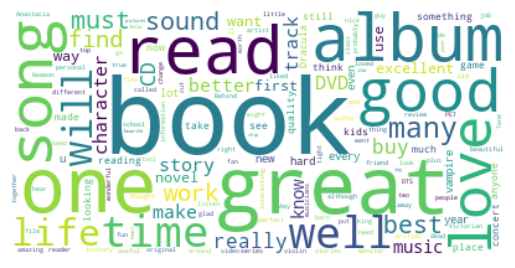

In [19]:
# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(positive_reviews)
 
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [23]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

In [ ]:
print('ok_')